
---

## Background Story

**Welcome to GlobalTech Solutions!**

You've just joined our Data Engineering team at a critical time. GlobalTech Solutions is a rapidly growing B2B software company that has expanded internationally over the past three years. We started in North America and recently acquired a major competitor in Latin America to accelerate our regional expansion.

### The Situation

Here's what happened:

**2022:** GlobalTech launches in North America with a brand-new Salesforce instance set up by our founding team. They chose a camelCase naming convention and built custom fields around our NA market needs.

**2023:** We acquire "TechLatam," a successful software company operating across Brazil, Argentina, Chile, Colombia, and Peru. They've been using their own Salesforce instance for 5 years, with underscore_case naming conventions and fields optimized for their regional operations.

**2024 (Now):** Our CEO wants to understand global sales performance, but we have a problem - **our data lives in two completely separate systems with different structures, and nobody can get a clear picture of our worldwide pipeline.**

### Your Mission

The VP of Sales Operations has approached the Data Engineering team with an urgent request:

> *"We're losing opportunities because we can't see the full picture. Last quarter, we almost lost a major deal because two teams were pursuing the same enterprise client without knowing it. We need a unified view of our leads and opportunities across all regions - and we need it fast."*

Additionally, the CFO wants to present global sales metrics to the board next month and needs answers to questions like:
- What's our global lead-to-opportunity conversion rate?
- Which lead sources generate the highest ROI across regions?
- Are we seeing different patterns in NA vs LATAM markets?
- Should we reallocate marketing budget between regions?

**Your task:** Create the foundation for our global sales analytics platform by integrating data from both regional Salesforce instances into a unified, clean, and analytically-ready dataset.

---

## Real-World Constraints

1. **Legacy naming conventions:** The NA team loves camelCase. The LATAM team (acquired company) used underscore_case. Neither team is "wrong" - they just evolved independently.

2. **No data governance:** Both teams entered data how they saw fit. You'll find "Hot" leads in NA and "A-rated" leads in LATAM that mean the same thing.

3. **Regional differences:** Phone formats differ. Some country names are in full form, others are abbreviations. Deal amounts are all in USD but entered with varying precision.

4. **Human error:** Data entry isn't perfect. You'll find typos, missing values, duplicates, and even some leads that were converted but have no corresponding opportunities.

5. **Cross-region duplicates:** Some enterprise clients appear in both systems. Your solution needs to identify these.

### What Success Looks Like

The Sales Ops team wants to be able to:
- **Run global reports** without manual data wrangling
- **Trust the data** - no more "which number is correct?" debates
- **Compare regions fairly** - apples-to-apples metrics
- **Scale easily** - we're eyeing expansion into EMEA and APAC next year

---

## Overview
You will receive **four datasets** representing two regional Salesforce instances (North America and LATAM). Your task is to demonstrate your data engineering skills by integrating, cleaning, mapping, and deriving insights from this multi-region data.

**Tech stack:** Your choice (bonus points for creativity and modern tools)

---

## Challenge Overview

You are working for GlobalTech Solutions, which operates two independent Salesforce instances:
1. **North America (NA)** - Using camelCase naming convention (original system)
2. **Latin America (LATAM)** - Using underscore_case naming convention (acquired from TechLatam)

These instances were set up independently by different teams and have:
- **Different field naming conventions** (e.g., `LeadID` vs `Lead_ID`, `EmailAddress` vs `Email_Address`)
- **Different field name choices** (e.g., `Industry` vs `Industry_Sector`, `Amount` vs `Deal_Amount`)
- **Similar but inconsistent value formats** (e.g., `Closed Won` vs `CLOSED WON`, `Tech` vs `Technology`)
- **Regional variations** (e.g., phone formats, postal codes)
- **Similar but not identical** data quality issues

Your task is to create a **unified global view** of the sales pipeline that enables leadership to make data-driven decisions across regions.

---


## Datasets Provided

### North America Instance

#### 1. `na_lead.csv` (~618 records)
**Key fields (camelCase convention):**
- `LeadID`: Unique identifier (format: NA-LEAD-XXXXXX)
- `FirstName`, `LastName`: Contact names
- `EmailAddress`: Contact email
- `PhoneNumber`: Phone (US/Canada format)
- `CompanyName`: Company name
- `JobTitle`: Job title
- `Industry`: Industry classification (needs standardization)
- `LeadStatus`: Status (New, Contacted, Qualified, Disqualified, Converted)
- `LeadSource`: Origin of lead (needs standardization)
- `Country`: Country (needs standardization to ISO codes)
- `CompanySize`: Company size category (needs mapping)
- `LeadRating`: Hot/Warm/Cold (needs standardization)
- `ProductInterest`: Product line (needs mapping to catalog)
- `CampaignID`: Campaign identifier
- `CreatedDate`, `ConvertedDate`: Timestamps
- `Region`: "North America"

#### 2. `na_opportunity.csv` (~268 records)
**Key fields (camelCase convention):**
- `OpportunityID`: Unique identifier (format: NA-OPP-XXXXXX)
- `LeadID`: Reference to lead (NA-LEAD-XXXXXX)
- `Amount`: Deal value (USD)
- `Stage`: Sales stage (needs standardization)
- `Probability`: Win probability (%)
- `SalesType`: New Business/Upsell/etc (needs standardization)
- `ProductLine`: Product (needs mapping)
- `ExpectedCloseDate`, `CreatedDate`: Timestamps
- `Region`: "North America"

### LATAM Instance

#### 3. `latam_lead.csv` (~463 records)
**Key fields (underscore_case convention):**
- `Lead_ID`: Unique identifier (format: LATAM-LEAD-XXXXXX)
- `First_Name`, `Last_Name`: Contact names
- `Email_Address`: Contact email
- `Phone`: Phone (LATAM format)
- `Company`: Company name
- `Job_Title`: Job title
- `Industry_Sector`: Industry classification (needs standardization)
- `Status`: Status (New, Contacted, Qualified, Disqualified, Converted)
- `Source`: Origin of lead (needs standardization)
- `Country_Code`: Country (needs standardization to ISO codes)
- `Size`: Company size (needs mapping)
- `Rating`: Rating (Hot/Warm/Cold or A/B/C, needs standardization)
- `Product_Interest`: Product line (needs mapping)
- `Campaign_Code`: Campaign identifier
- `Date_Created`, `Date_Converted`: Timestamps
- `Region`: "LATAM"

#### 4. `latam_opportunity.csv` (~190 records)
**Key fields (underscore_case convention):**
- `Opportunity_ID`: Unique identifier (format: LATAM-OPP-XXXXXX)
- `Lead_ID`: Reference to lead (LATAM-LEAD-XXXXXX)
- `Deal_Amount`: Deal value (USD)
- `Sales_Stage`: Sales stage (needs standardization)
- `Win_Probability`: Win probability (%)
- `Type`: Sales type (needs standardization)
- `Product`: Product (needs mapping)
- `Expected_Close`, `Date_Created`: Timestamps
- `Region`: "LATAM"

---

## Your Tasks

### 1. Schema Mapping & Integration (Critical Priority)

**Create a unified schema** that combines both regional instances:

- Map field names (e.g., `LeadID` + `Lead_ID` → `lead_id`)
- Map semantic differences (e.g., `Industry` + `Industry_Sector` → `industry`)
- Standardize naming convention (recommend snake_case)
- Create a single `leads` table and single `opportunities` table
- Preserve regional origin information for reporting

**Why this matters:** Without a unified schema, every analyst has to manually join and transform data, leading to inconsistent results and wasted time.

### 2. Corporate Value Mapping (Data Governance)

**Map all regional variations to corporate standard values:**

You must create standardized mappings for:

**a) Lead Source** (Web Form, web form, Website → "Website")
- Map to: Website, Referral, Cold Call, LinkedIn, Trade Show, Email Marketing, Partner, Paid Ads, Other

**b) Industry** (Technology, Tech, TECH → "Technology")
- Map to: Technology, Financial Services, Healthcare, Retail, Manufacturing, Education, Other

**c) Company Size** (1-10, Small, 1 to 10 → "1-10 employees")
- Map to: 1-10 employees, 11-50 employees, 51-200 employees, 201-1000 employees, 1000+ employees

**d) Lead Rating** (Hot, HOT, H, A → "Hot")
- Map to: Hot, Warm, Cold

**e) Lead Status** (New, new, NEW → "New")
- Map to: New, Contacted, Qualified, Nurturing, Disqualified, Converted

**f) Opportunity Stage** (Closed Won, CLOSED WON, closed won → "Closed Won")
- Map to: Prospecting, Qualification, Needs Analysis, Proposal, Negotiation, Closed Won, Closed Lost

**g) Sales Type** (New Business, new business, New → "New Business")
- Map to: New Business, Upsell, Cross-sell, Renewal

**h) Product Line** (Cloud Suite, cloud suite, Cloud → "Cloud Platform")
- Map to: Cloud Platform, Analytics Platform, Security Suite, Integration Tools

**i) Country Codes** (USA, US, United States → "US"; Brasil, Brazil, BR → "BR")
- Map to ISO 3166-1 alpha-2 codes (US, CA, MX, BR, AR, CL, CO, PE)

**Why this matters:** The CFO can't compare "Technology" vs "Tech" companies, and marketing can't measure "Web Form" vs "Website" leads. Standardization enables real analysis.

### 3. Data Quality & Cleaning (Trust Building)

Clean all traditional data quality issues:
- Missing values
- Duplicates (within and across regions!)
- Inconsistent formatting (emails, phone numbers)
- Invalid data (probability >100, dates)
- Orphan opportunities (opportunities without matching leads)
- Business logic violations (e.g., converted leads without opportunities)

**Why this matters:** Sales Ops lost a $500K deal last quarter because duplicate records made them think they were talking to two different companies. Data quality isn't optional.

### 4. Business Logic Implementation (Answer Real Questions)

Calculate key metrics **by region and globally**:

Must include (feel free to add more):
- Lead-to-opportunity conversion rate (by region, by source, globally)
- Opportunity win rate (by region, by stage)
- Average deal size (by region, by product line)
- Sales cycle length (time from lead to closed-won)
- Pipeline value (total and weighted by probability)


### 5. Use Case & Analytics (Tell the Story)

Create an analytical use case such as (feel free to develop more insights):
- **Regional performance comparison:** Is NA or LATAM more efficient? Why?
- **Global lead source ROI analysis:** Which channels should we invest in?
- **Product-market fit:** Do certain products perform better in certain regions?
- **Actionable recommendations:** What should we do differently?

**Why this matters:** Data without insights is just numbers. Leadership needs recommendations, not just dashboards.

---

## Deliverables

1. **Unified Data Tables**
   - `unified_leads.csv` or equivalent
   - `unified_opportunities.csv` or equivalent

2. **Code/Scripts**
   - Data integration pipeline
   - Mapping dictionaries/tables
   - Quality checks and validation

3. **Documentation**
   - README with setup instructions
   - Schema mapping documentation
   - Data quality findings
   - Business logic explanations

4. **Analysis & Insights**
   - Key metrics calculated
   - Visualizations (optional but encouraged)
   - Recommendations for leadership

---

## Bonus Points

- **Automated mapping framework** (think: what if we add EMEA next month?)
- **Data quality testing suite** (catch issues before they reach production)
- **Scalability considerations** (how would this work with 10x more data?)
- **Creative visualization** (make regional differences obvious at a glance)
- **Thought on future state** (what should our ideal architecture look like?)

---

## Tips for Success

1. **Start with exploration** - Understand both schemas before integrating
2. **Create mapping dictionaries** - Don't hardcode mappings in logic
3. **Think reusability** - New regions might be added later (EMEA, APAC)
4. **Document decisions** - Why did you map X to Y?
5. **Test your mappings** - Did all values get mapped correctly?
6. **Consider edge cases** - What if a value doesn't match any mapping?
7. **Think globally** - This is about creating ONE source of truth
8. **Handle case sensitivity** - "Hot" vs "HOT" vs "hot"
9. **Validate business logic** - Do your metrics make sense?
10. **Think like a stakeholder** - Would you trust this data for a board presentation?

---

## What We're Looking For

Beyond technical skills, we want to see:

✅ **Problem-solving approach:** How do you tackle ambiguity?
✅ **Communication:** Can you explain complex technical decisions clearly?
✅ **Business thinking:** Do you understand why this matters?
✅ **Attention to detail:** Did you catch the edge cases?
✅ **Scalability mindset:** Will this solution work as we grow?
✅ **Code quality:** Is your code maintainable by the team?

---


## Questions?

If you have questions about the requirements, business context, or technical details, please email konrad.cybulski@pl.sika.com.

**Good luck! We're excited to see how you tackle this real-world multi-region integration challenge.**



In [549]:
import pandas as pd

# import the data sets 
latam_lead = pd.read_csv("latam_lead.csv")
latam_opportunity = pd.read_csv("latam_opportunity.csv")

na_lead = pd.read_csv("na_lead.csv")
na_opportunity = pd.read_csv("na_opportunity.csv")

In [550]:
# unify the names of the columns, to all be snake case

# here we replace the space in between the end of the first word and the capital letter of the next word with a "_" 
# then we make it all lower case 
na_lead.columns = (
    na_lead.columns
    .str.replace("([a-z0-9])([A-Z])", r"\1_\2", regex=True)
    .str.lower()
)

na_opportunity.columns = (
    na_opportunity.columns
    .str.replace("([a-z0-9])([A-Z])", r"\1_\2", regex=True)
    .str.lower()
    .str.strip()
)

# make sure the latam names are all lower case 

latam_lead.columns = (
    latam_lead.columns
    .str.lower()
)

latam_opportunity.columns = (
    latam_opportunity.columns
    .str.lower()
    .str.strip()
)

print(na_lead.columns, latam_lead.columns)
print(na_opportunity.columns, latam_opportunity.columns)


Index(['lead_id', 'first_name', 'last_name', 'email_address', 'phone_number',
       'company_name', 'job_title', 'industry', 'lead_status', 'lead_source',
       'country', 'state_province', 'postal_code', 'annual_revenue',
       'number_of_employees', 'company_size', 'lead_rating', 'lead_score',
       'campaign_id', 'product_interest', 'created_date', 'converted_date',
       'last_activity_date', 'description', 'website', 'region'],
      dtype='object') Index(['lead_id', 'first_name', 'last_name', 'email_address', 'phone',
       'company', 'job_title', 'industry_sector', 'status', 'source',
       'country_code', 'state', 'zip_code', 'annual_revenue_usd',
       'employee_count', 'size', 'rating', 'score', 'campaign_code',
       'product_interest', 'date_created', 'date_converted', 'last_activity',
       'notes', 'web_site', 'region'],
      dtype='object')
Index(['opportunity_id', 'lead_id', 'opportunity_name', 'amount', 'stage',
       'probability', 'expected_close_date', '

In [551]:
# now we want to unify the column names such that for example Industry + Industry_Sector → industry

# this checks which items don't match 
set(na_lead.columns) ^ set(latam_lead.columns)

COLUMN_MAP_lead = {
    "phone_number" : "phone",
    "company_name" : "company", 
    "industry_sector" : "industry", 
    "status" : "lead_status", 
    "source" : "lead_source",
    "country_code" : "country", 
    "state" : "state_province", 
    "postal_code" : "zip_code", 
    "annual_revenue_usd" : "annual_revenue", 
    "number_of_employees" : "employee_count", 
    "size" : "company_size", 
    "rating" : "lead_rating", 
    "score" : "lead_score", 
    "campaign_code" : "campaign_id", 
    "created_date" : "date_created", 
    "converted_date" : "date_converted", 
    "last_activity" : "last_activity_date", 
    "notes" : "description", 
    "web_site" : "website"
}

na_lead = na_lead.rename(columns=lambda c: COLUMN_MAP_lead.get(c, c))
latam_lead = latam_lead.rename(columns=lambda c: COLUMN_MAP_lead.get(c, c))

# this set is now empty, so all the names match up
print(set(na_lead.columns) ^ set(latam_lead.columns))
print(na_lead.columns)

set()
Index(['lead_id', 'first_name', 'last_name', 'email_address', 'phone',
       'company', 'job_title', 'industry', 'lead_status', 'lead_source',
       'country', 'state_province', 'zip_code', 'annual_revenue',
       'employee_count', 'company_size', 'lead_rating', 'lead_score',
       'campaign_id', 'product_interest', 'date_created', 'date_converted',
       'last_activity_date', 'description', 'website', 'region'],
      dtype='object')


In [552]:
# combine the datatables 

lead_combined = pd.concat([na_lead, latam_lead])

# check the dimensions 
print("number of combined entries = ", lead_combined.shape[0], ". Should be number = ", na_lead.shape[0] + latam_lead.shape[0])
lead_combined.tail()


number of combined entries =  1081 . Should be number =  1081


,lead_id,first_name,last_name,email_address,phone,company,job_title,industry,lead_status,lead_source,...,lead_rating,lead_score,campaign_id,product_interest,date_created,date_converted,last_activity_date,description,website,region
458,LATAM-LEAD-000459,Carlos,Costa,carlos.costa@solucionessmart.com.br,+54 9 22 9621-8055,SolucionesSmart,Dir,Education,New,Advertisement,...,C,9.0,t4-2024-webinar,Analytics Platform,2024-04-03,NaN,2024-06-21,Lead from Partner,NaN,LATAM
459,LATAM-LEAD-000460,Laura,Silva,LAURA.SILVA@CLOUDCHILE.COM,+54 9 27 7082-1039,CloudChile,VP Marketing,Healthcare,Converted,Web Form,...,NaN,36.0,NaN,Integration Tools,2024-10-12,2025-02-01,2024-12-27,Lead from web form,NaN,LATAM
460,LATAM-LEAD-000461,Fernando,González,NaN,+55 51 96199-5487,SolucionesSmart,NaN,TECH,Contacted,Advertisement,...,Hot,66.0,NaN,Security Suite,2024-04-10,NaN,NaN,Lead from Web Form,www.solucionessmart.com.br,LATAM
461,LATAM-LEAD-000462,Carlos,Rodríguez,CARLOS.RODRÍGUEZ@DATAARGENTINA.COM.CO,+54 9 66 8953-8324,DataArgentina,CEO,Consumer Goods,New,NaN,...,Warm,62.0,PROMO-NAVIDAD-2024,cloud suite,2022-03-08,NaN,2022-05-12,Lead from Partner,www.dataargentina.com.br,LATAM
462,LATAM-LEAD-000463,José,Pérez,JOSÉ@INVALID,NaN,DataArgentina,Gerente,Retail,Disqualified,Trade Show,...,A,NaN,t4-2024-webinar,Integration Tools,2024-07-03,NaN,2024-08-04,Lead from Email Marketing,www.dataargentina.com.br,LATAM


In [581]:
# now we need to unify the column names for opportunities 

# this checks which items don't match 
set(na_opportunity.columns) ^ set(latam_opportunity.columns)

COLUMN_MAP_opportunity = {
    "deal_amount" : "amount", 
    "sales_stage" : "stage", 
    "probability" : "win_probability", 
    "expected_close" : "expected_close_date", 
    "created_date" : "date_created", 
    "account_owner" : "account_manager", 
    "type" : "sales_type", 
    "lead_source" : "lead_source_opp", 
    "product_line" : "product", 
    "next_step" : "next_steps", 
    "competitor_info" : "competitor"
}

na_opportunity = na_opportunity.rename(columns=lambda c: COLUMN_MAP_opportunity.get(c, c))
latam_opportunity = latam_opportunity.rename(columns=lambda c: COLUMN_MAP_opportunity.get(c, c))

# this set is now empty, so all the names match up
print(set(na_opportunity.columns) ^ set(latam_opportunity.columns))

set()


In [582]:
# combine the datatables 

opportunity_combined = pd.concat([na_opportunity, latam_opportunity])

# check the dimensions 
print("number of combined entries = ", opportunity_combined.shape[0], ". Should be number = ", na_opportunity.shape[0] + latam_opportunity.shape[0])
opportunity_combined.head()

number of combined entries =  458 . Should be number =  458


,opportunity_id,lead_id,opportunity_name,amount,stage,win_probability,expected_close_date,date_created,account_manager,sales_type,lead_source_opp,product,forecast_category,next_steps,competitor,loss_reason,region
0,NA-OPP-000001,NA-LEAD-000001,TechCorp - Opportunity,324716.0,NaN,71,2024-03-17,2023-07-18,Bob Smith,Cross-sell,NaN,Analytics Platform,NaN,Send proposal,Salesforce,NaN,North America
1,NA-OPP-000002,NA-LEAD-000006,InnovateLab - Opportunity,240549.0,closed won,100,2023-10-23,2023-04-06,NaN,Cross-sell,LinkedIn,Integration Tools,Commit,NaN,NaN,NaN,North America
2,NA-OPP-000003,NA-LEAD-000010,DataInc - Opportunity,98031.0,closed won,100,2023-01-17,2022-10-03,Dave Brown,New,Paid Ads,Analytics Platform,NaN,Schedule demo,NaN,NaN,North America
3,NA-OPP-000004,NA-LEAD-000017,FutureTech - Opportunity,130291.0,Proposal,55,2025-07-01,2024-09-03,Dave Brown,Cross-sell,LinkedIn,Integration Tools,Commit,Follow up,Oracle,NaN,North America
4,NA-OPP-000005,NA-LEAD-000018,SmartSolutions - Opportunity,NaN,Needs Analysis,50,2023-11-01,2023-03-10,NaN,Upsell,Trade Show,Analytics,Pipeline,NaN,Oracle,NaN,North America


In [584]:
opportunity_combined.to_csv("opportunity_combined.csv")
lead_combined.to_csv("lead_combined.csv")

### We have loaded and initially checked the data

Next we want to make the data more consistent.

a) Lead Source (Web Form, web form, Website → "Website")
Map to: Website, Referral, Cold Call, LinkedIn, Trade Show, Email Marketing, Partner, Paid Ads, Other

b) Industry (Technology, Tech, TECH → "Technology")
Map to: Technology, Financial Services, Healthcare, Retail, Manufacturing, Education, Other

c) Company Size (1-10, Small, 1 to 10 → "1-10 employees")
Map to: 1-10 employees, 11-50 employees, 51-200 employees, 201-1000 employees, 1000+ employees

d) Lead Rating (Hot, HOT, H, A → "Hot")
Map to: Hot, Warm, Cold

e) Lead Status (New, new, NEW → "New")
Map to: New, Contacted, Qualified, Nurturing, Disqualified, Converted

In [587]:
# check the different values in the respective column 

# lead first
lead_combined["lead_source"].unique()
# lead source to: Website, Referral, Cold Call, LinkedIn, Trade Show, Email Marketing, Partner, Paid Ads, Other
source = {
    "Web Form" : "Website", 
    "web form" : "Website", 
    "REFERRAL" : "Referral", 
    "Advertisement" : "Other"
}
lead_combined["lead_source"] = lead_combined["lead_source"].map(source).fillna(lead_combined["lead_source"])
opportunity_combined["lead_source_opp"] = opportunity_combined["lead_source_opp"].map(source).fillna(opportunity_combined["lead_source_opp"])

lead_combined["industry"].unique()
# industry to: Technology, Financial Services, Healthcare, Retail, Manufacturing, Education, Other
industry = {
    "Retail & Consumer" : "Retail", 
    "Consumer Goods" : "Retail", 
    "Tech" : "Technology", 
    "TECH" : "Technology", 
    "technology" : "Technology", 
    "Finance" : "Financial Services", 
    "Health Care" : "Healthcare", 
    "Health" : "Healthcare"
}
lead_combined["industry"] = lead_combined["industry"].map(industry).fillna(lead_combined["industry"])

lead_combined["company_size"].unique()
# company size to: 1-10 employees, 11-50 employees, 51-200 employees, 201-1000 employees, 1000+ employees
company_size = {
    "1 to 10" : "1-10 employees", 
    "1-10" : "1-10 employees", 
    "11-50" : "11-50 employees", 
    "51-200" : "51-200 employees",
    "Small" : "51-200 employees",
    "201-1000" : "201-1000 employees", 
    "Medium" : "201-1000 employees", 
    "1000+" : "1000+ employees", 
    "Large" : "1000+ employees", 
    "Enterprise" : "1000+ employees"
}
# note: how to assign Enterprise, Small, Medium and Large ? 
# We googled the average employee number of these classifications to assign them above
lead_combined["company_size"] = lead_combined["company_size"].map(company_size).fillna(lead_combined["company_size"])

lead_combined["lead_rating"].unique()
# lead_rating to: Hot, Warm, Cold
lead_rating = {
    "H" : "Hot", 
    "HOT" : "Hot", 
    "A" : "Hot",
    "warm" : "Warm", 
    "W" : "Warm", 
    "C" : "Cold", 
    "B" : "Cold", 
}
# note: how to assign B, A ? 
lead_combined["lead_rating"] = lead_combined["lead_rating"].map(lead_rating).fillna(lead_combined["lead_rating"])

lead_combined["lead_status"].unique()
# lead_status to: New, Contacted, Qualified, Nurturing, Disqualified, Converted
lead_status = {
    "new" : "New", 
    "NEW" : "New"
}
lead_combined["lead_status"] = lead_combined["lead_status"].map(lead_status).fillna(lead_combined["lead_status"])

lead_combined["country"].unique()
# country to: ISO 3166-1 alpha-2 codes (US, CA, MX, BR, AR, CL, CO, PE)
country = {
    "United States" : "US", 
    "USA" : "US", 
    "Canada" : "CA", 
    "Mexico" : "MX", 
    "Chile" : "CL", 
    "Brazil" : "BR", 
    "Peru" : "PE", 
    "Argentina" : "AR", 
    "Colombia": "CO" 
}
lead_combined["country"] = lead_combined["country"].map(country).fillna(lead_combined["country"])

region = {
    "North America" : "NA"
}
lead_combined["region"] = lead_combined["region"].map(region).fillna(lead_combined["region"])


f) Opportunity Stage (Closed Won, CLOSED WON, closed won → "Closed Won")
Map to: Prospecting, Qualification, Needs Analysis, Proposal, Negotiation, Closed Won, Closed Lost

g) Sales Type (New Business, new business, New → "New Business")
Map to: New Business, Upsell, Cross-sell, Renewal

h) Product Line (Cloud Suite, cloud suite, Cloud → "Cloud Platform")
Map to: Cloud Platform, Analytics Platform, Security Suite, Integration Tools

i) Country Codes (USA, US, United States → "US"; Brasil, Brazil, BR → "BR")
Map to ISO 3166-1 alpha-2 codes (US, CA, MX, BR, AR, CL, CO, PE)

In [588]:
opportunity_combined["stage"].unique()
# stage to: Prospecting, Qualification, Needs Analysis, Proposal, Negotiation, Closed Won, Closed Lost
stage = {
    "closed won" : "Closed Won", 
    "CLOSED WON" : "Closed Won"
}
opportunity_combined["stage"] = opportunity_combined["stage"].map(stage).fillna(opportunity_combined["stage"])

opportunity_combined["sales_type"].unique()
# sales type to: New Business, Upsell, Cross-sell, Renewal
sales_type = {
    "New" : "New Business", 
    "new business" : "New Business"
}
opportunity_combined["sales_type"] = opportunity_combined["sales_type"].map(sales_type).fillna(opportunity_combined["sales_type"])

opportunity_combined["product"].unique()
# product type to: Cloud Platform, Analytics Platform, Security Suite, Integration Tools
product = {
    "Analytics" : "Analytics Platform", 
    "Cloud Suite" : "Cloud Platform", 
    "cloud suite" : "Cloud Platform",
    "cloud" : "Cloud Platform"
}

opportunity_combined["product"] = opportunity_combined["product"].map(product).fillna(opportunity_combined["product"])

region = {
    "North America" : "NA"
}
opportunity_combined["region"] = opportunity_combined["region"].map(region).fillna(opportunity_combined["region"])
opportunity_combined.head()

,opportunity_id,lead_id,opportunity_name,amount,stage,win_probability,expected_close_date,date_created,account_manager,sales_type,lead_source_opp,product,forecast_category,next_steps,competitor,loss_reason,region
0,NA-OPP-000001,NA-LEAD-000001,TechCorp - Opportunity,324716.0,NaN,71,2024-03-17,2023-07-18,Bob Smith,Cross-sell,NaN,Analytics Platform,NaN,Send proposal,Salesforce,NaN,NA
1,NA-OPP-000002,NA-LEAD-000006,InnovateLab - Opportunity,240549.0,Closed Won,100,2023-10-23,2023-04-06,NaN,Cross-sell,LinkedIn,Integration Tools,Commit,NaN,NaN,NaN,NA
2,NA-OPP-000003,NA-LEAD-000010,DataInc - Opportunity,98031.0,Closed Won,100,2023-01-17,2022-10-03,Dave Brown,New Business,Paid Ads,Analytics Platform,NaN,Schedule demo,NaN,NaN,NA
3,NA-OPP-000004,NA-LEAD-000017,FutureTech - Opportunity,130291.0,Proposal,55,2025-07-01,2024-09-03,Dave Brown,Cross-sell,LinkedIn,Integration Tools,Commit,Follow up,Oracle,NaN,NA
4,NA-OPP-000005,NA-LEAD-000018,SmartSolutions - Opportunity,NaN,Needs Analysis,50,2023-11-01,2023-03-10,NaN,Upsell,Trade Show,Analytics Platform,Pipeline,NaN,Oracle,NaN,NA


Clean all traditional data quality issues:

- Missing values
- Duplicates (within and across regions!)
- Inconsistent formatting (emails, phone numbers)
- Invalid data (probability >100, dates)
- Orphan opportunities (opportunities without matching leads)
- Business logic violations (e.g., converted leads without opportunities)


In [558]:
# find invalid data, for example probability above 100 

invalid_rows = opportunity_combined[(opportunity_combined["win_probability"] < 0) | (opportunity_combined["win_probability"] > 100)]
print(invalid_rows)

# we see that there are two rows corresponding to the probability case, which we delete
opportunity_combined = opportunity_combined[(opportunity_combined["win_probability"] >= 0) & (opportunity_combined["win_probability"] <= 100)]


       opportunity_id            lead_id           opportunity_name    amount  \
22   LATAM-OPP-000023  LATAM-LEAD-000053   CloudChile - Opportunity  222793.0   
131  LATAM-OPP-000132  LATAM-LEAD-000349  DigitalPeru - Opportunity  282750.0   

              stage  win_probability expected_close_date date_created  \
22      Prospecting              119          2022-08-21   2022-04-20   
131  Needs Analysis              117          2024-08-20   2023-09-03   

    account_manager sales_type lead_source_opp         product  \
22   José Rodriguez     Upsell   Advertisement           Cloud   
131   Carlos Mendez        NaN             NaN  Security Suite   

    forecast_category     next_steps  competitor loss_reason region  
22                NaN  Send proposal  Salesforce         NaN  LATAM  
131           Omitted      Follow up         SAP         NaN  LATAM  


In [559]:
# check also if there are "won" cases, where the winning prob is not = 100? 

opportunity_combined[(opportunity_combined["stage"] == "Closed Won") & (opportunity_combined["win_probability"] < 100)]

# shouldn't these be 100? depending on whether the win_probability is updated throughout the process 

,opportunity_id,lead_id,opportunity_name,amount,stage,win_probability,expected_close_date,date_created,account_manager,sales_type,lead_source_opp,product,forecast_category,next_steps,competitor,loss_reason,region
65,NA-OPP-000066,NA-LEAD-000168,NaN,480494.0,Closed Won,21,2023-05-09,2022-12-30,Alice Johnson,New Business,NaN,Cloud Platform,Omitted,Schedule demo,NaN,NaN,NA
132,NA-OPP-000133,NA-LEAD-000301,CloudSystems - Opportunity,480746.0,Closed Won,59,2022-12-19,2022-06-11,Alice Johnson,Cross-sell,Email Marketing,Analytics Platform,NaN,Send proposal,SAP,NaN,NA
137,NA-OPP-000138,NA-LEAD-000314,SmartSolutions - Opportunity,141979.0,Closed Won,60,2023-06-11,2023-01-18,Dave Brown,Upsell,LinkedIn,NaN,Pipeline,Follow up,NaN,NaN,NA
256,NA-OPP-000257,NA-LEAD-009999,Orphan Opportunity,99108.0,Closed Won,51,2026-05-08,2025-12-16,Alice Johnson,Cross-sell,Cold Call,NaN,Best Case,Follow up,NaN,NaN,NA
257,NA-OPP-000258,NA-LEAD-010000,Orphan Opportunity,79734.0,Closed Won,40,2026-01-27,2025-12-16,Alice Johnson,New Business,Referral,Cloud Platform,Best Case,Follow up,NaN,NaN,NA
258,NA-OPP-000259,NA-LEAD-010001,Orphan Opportunity,94810.0,Closed Won,58,2026-02-07,2025-12-16,Bob Smith,New Business,Paid Ads,Cloud Platform,Pipeline,Follow up,NaN,NaN,NA
263,NA-OPP-000264,NA-LEAD-010006,Orphan Opportunity,60706.0,Closed Won,65,2026-02-20,2025-12-16,Bob Smith,Cross-sell,NaN,Cloud Platform,Best Case,Follow up,NaN,NaN,NA
2,LATAM-OPP-000003,LATAM-LEAD-000007,TecnoBrasil - Opportunity,469958.0,Closed Won,23,2023-06-22,2022-12-22,Carlos Mendez,Renewal,Referral,Analytics Platform,NaN,NaN,NaN,NaN,LATAM
6,LATAM-OPP-000007,LATAM-LEAD-000015,TecnoBrasil - Opportunity,266018.0,Closed Won,46,2024-09-12,2024-03-08,NaN,Cross-sell,Partner,Security Suite,Commit,Follow up,Salesforce,NaN,LATAM
33,LATAM-OPP-000034,LATAM-LEAD-000073,InnovaColombia - Opportunity,408846.0,Closed Won,37,2023-11-12,2023-01-02,NaN,New Business,Advertisement,Analytics Platform,Best Case,Schedule demo,SAP,NaN,LATAM


In [560]:
# we want all the emails lowercase 

lead_combined["email_address"] = lead_combined["email_address"].str.lower()
lead_combined["email_address"]

0               william.johnson@techcorp.com
1                     lisa.jones@techcorp.io
2                                        NaN
3                   richard.smith@datainc.co
4             michael.garcia@cloudsystems.io
                       ...                  
458      carlos.costa@solucionessmart.com.br
459               laura.silva@cloudchile.com
460                                      NaN
461    carlos.rodríguez@dataargentina.com.co
462                             josé@invalid
Name: email_address, Length: 1081, dtype: object

In [589]:
# unify the phone numbers 

# first clean out anything that isnt a number from the phone numbers column
lead_combined["phone"] = (
    lead_combined["phone"]
    .astype(str)
    .str.replace(r"\D+", "", regex=True)
)
# now we want to establish which ones we need to remove/add the country code to, for that we use a function
# for different locations, we would need different country codes 
def normalize_us_phone(p):
    if len(p) == 10:
        return "+1" + p
    elif len(p) == 11 and p.startswith("1"):
        return "+" + p
    else:
        return None

lead_combined["phone"] = lead_combined["phone"].apply(normalize_us_phone)
lead_combined["phone"]

0      +12954234811
1      +12468774733
2      +14742674456
3              None
4      +17802802403
           ...     
458            None
459            None
460            None
461            None
462            None
Name: phone, Length: 1081, dtype: object

In [590]:
# change all the dates to date time format
opportunity_combined["expected_close_date"] = pd.to_datetime(opportunity_combined["expected_close_date"], errors="coerce")
opportunity_combined["date_created"] = pd.to_datetime(opportunity_combined["date_created"], errors="coerce")
lead_combined["date_created"] = pd.to_datetime(lead_combined["date_created"], errors="coerce")
lead_combined["date_converted"] = pd.to_datetime(lead_combined["date_converted"], errors="coerce")
lead_combined["last_activity_date"] = pd.to_datetime(lead_combined["last_activity_date"], errors="coerce")


In [591]:
# find invalid dates 
# for opportunity
invalid_opp_expected = opportunity_combined[opportunity_combined["expected_close_date"].isna()]
invalid_opp_created = opportunity_combined[opportunity_combined["date_created"].isna()]

# for lead
invalid_lead_created = lead_combined[lead_combined["date_created"].isna()]
invalid_lead_converted = lead_combined[lead_combined["date_converted"].isna()]
invalid_lead_last = lead_combined[lead_combined["last_activity_date"].isna()]

# most important is that there are no empty "date_created" entries. 
print(invalid_lead_created, invalid_opp_created)
# there are none. Note that other cases could be "correct". 

Empty DataFrame
Columns: [lead_id, first_name, last_name, email_address, phone, company, job_title, industry, lead_status, lead_source, country, state_province, zip_code, annual_revenue, employee_count, company_size, lead_rating, lead_score, campaign_id, product_interest, date_created, date_converted, last_activity_date, description, website, region]
Index: []

[0 rows x 26 columns] Empty DataFrame
Columns: [opportunity_id, lead_id, opportunity_name, amount, stage, win_probability, expected_close_date, date_created, account_manager, sales_type, lead_source_opp, product, forecast_category, next_steps, competitor, loss_reason, region]
Index: []


In [564]:
# check if there are situations where the expected close date is smaller than the date created (this would not make sense) 

invalid_dates = opportunity_combined[opportunity_combined["expected_close_date"] < opportunity_combined["date_created"]]
# there seem to be none
invalid_dates

,opportunity_id,lead_id,opportunity_name,amount,stage,win_probability,expected_close_date,date_created,account_manager,sales_type,lead_source_opp,product,forecast_category,next_steps,competitor,loss_reason,region


In [592]:
# check for duplicates 
print("Lead_combined has ", len(lead_combined[lead_combined.duplicated(subset=lead_combined.iloc[:, 1:], keep=False)]), "duplicates.")
print("Opportunity_combined has ", len(opportunity_combined[opportunity_combined.duplicated(subset=opportunity_combined.iloc[:, 2:-1], keep=False)]), "duplicates.")

# remove the duplicates 
lead_combined_no_dupes = lead_combined.drop_duplicates(subset=lead_combined.iloc[:, 1:], keep=False)
# opportunity_combined has no duplicates so we leave it unchanged. 


Lead_combined has  62 duplicates.
Opportunity_combined has  0 duplicates.


In [593]:
# we want to check for Orphan opportunities (opportunities without matching leads)
# we need to check the opportunity_combined dataframe and look for cases where lead_id is not in the lead_combined id list 

opportunity_combined = opportunity_combined[opportunity_combined["lead_id"].isin(lead_combined["lead_id"])]
# removed the not included lines 

In [594]:
# converted leads but no opportunity

converted_id = lead_combined[lead_combined["lead_status"] == "Converted"]["lead_id"]

# none of the opportunity ids are not represented in the converted IDs table 
opportunity_combined[~opportunity_combined["lead_id"].isin(converted_id)]

# there are IDs marked as converted which are not in the opportunity table 
missing = set(converted_id) ^ set(opportunity_combined["lead_id"])

# we could look into these missing leads 
missing_leads = lead_combined[lead_combined["lead_id"].isin(missing)]

# these should be added to the opportunity list 

,opportunity_id,lead_id,opportunity_name,amount,stage,win_probability,expected_close_date,date_created,account_manager,sales_type,lead_source_opp,product,forecast_category,next_steps,competitor,loss_reason,region,is_win
0,NA-OPP-000001,NA-LEAD-000001,TechCorp - Opportunity,324716.0,NaN,71,2024-03-17,2023-07-18,Bob Smith,Cross-sell,NaN,Analytics Platform,NaN,Send proposal,Salesforce,NaN,North America,False
1,NA-OPP-000002,NA-LEAD-000006,InnovateLab - Opportunity,240549.0,Closed Won,100,2023-10-23,2023-04-06,NaN,Cross-sell,LinkedIn,Integration Tools,Commit,NaN,NaN,NaN,North America,True
2,NA-OPP-000003,NA-LEAD-000010,DataInc - Opportunity,98031.0,Closed Won,100,2023-01-17,2022-10-03,Dave Brown,New Business,Paid Ads,Analytics Platform,NaN,Schedule demo,NaN,NaN,North America,True
3,NA-OPP-000004,NA-LEAD-000017,FutureTech - Opportunity,130291.0,Proposal,55,2025-07-01,2024-09-03,Dave Brown,Cross-sell,LinkedIn,Integration Tools,Commit,Follow up,Oracle,NaN,North America,False
4,NA-OPP-000005,NA-LEAD-000018,SmartSolutions - Opportunity,NaN,Needs Analysis,50,2023-11-01,2023-03-10,NaN,Upsell,Trade Show,Analytics Platform,Pipeline,NaN,Oracle,NaN,North America,False


### 4. Business Logic Implementation (Answer Real Questions)
#### Calculate key metrics by region and globally:

#### Must include (feel free to add more):

- Lead-to-opportunity conversion rate (by region, by source, globally)
- Opportunity win rate (by region, by stage)
- Average deal size (by region, by product line)
- Sales cycle length (time from lead to closed-won)
- Pipeline value (total and weighted by probability)


In [595]:
# Overall lead-to-opportunity conversion rate 

lead = lead_combined["lead_id"].count()
opp = opportunity_combined["opportunity_id"].count()

lead_to_opp = opp/lead * 100
# the rate is 42.18%

# by region
opp_region = opportunity_combined.groupby("region")["opportunity_id"].count()
lead_region = lead_combined.groupby("region")["lead_id"].count()

lead_to_opp_region = opp_region/lead_region * 100
# the rate is 40.6% for LATAM and 43.36% for NA

# to separate by source, we use groupby "source". 

In [596]:
# Opportunity win rate

opportunity_combined["stage"].unique()

# win rate overall

won = (opportunity_combined["stage"] == "Closed Won").sum()
closed = (opportunity_combined["stage"].str.contains("closed", case=False, na=False).sum())

win_rate = won/closed * 100
# the win rate is 66.88%

# now grouped by region 
# create helper column 
opportunity_combined["is_win"] = opportunity_combined["stage"].eq("Closed Won")

win_rate_region = (
    opportunity_combined[opportunity_combined["stage"].str.contains("closed", case=False, na=False)]
    .groupby("region")["is_win"]
    .mean()*100
)
# the win rate for LATAM is 63.63% and 68.62% for North America

# if you want to see the win rate based on other factors, you simply adjust above


<ipython-input-596-cec9c5aa2bff>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opportunity_combined["is_win"] = opportunity_combined["stage"].eq("Closed Won")


In [597]:
# Average deal size

# we sort by the the won cases and then take the mean of the amount
avg_deal_size = opportunity_combined[opportunity_combined["stage"] == "Closed Won"]["amount"].mean()
# the average deal size is 397887.62

avg_deal_region = (
    opportunity_combined[opportunity_combined["stage"] == "Closed Won"]
    .groupby("region")["amount"]
    .mean()
)
# the average deal size by region is 372421.23 for LATAM and 411208.50 for NA

avg_deal_product = (
    opportunity_combined[opportunity_combined["stage"] == "Closed Won"]
    .groupby("product")["amount"]
    .mean()
)

# the average deal size by product is 
# Analytics Platform    461699.50
# Cloud                 263482.45
# Cloud Platform        220701.16
# Integration Tools     240330.81
# Security Suite        326445.30

avg_deal_region_product = (
    opportunity_combined[opportunity_combined["stage"] == "Closed Won"]
    .groupby(["region", "product"])["amount"]
    .mean()
)

# region         product           
# LATAM         Analytics Platform    340728.000000
#               Cloud                 198434.600000
#               Cloud Platform        220885.200000
#               Integration Tools     184247.000000
#               Security Suite        347431.666667
# North America Analytics Platform    518152.866667
#               Cloud                 364287.800000
#               Cloud Platform        256731.705882
#               Integration Tools     252793.888889
#               Security Suite        317451.142857

In [598]:
# Sales cycle length (time from lead to closed-won)
# note that the date created in the opportunities DF should correspond to the date created in the lead DF
# Thus we can just consider the difference between these two values.

opportunity_combined.head()
lead_combined.head()

opp_won = opportunity_combined[opportunity_combined["stage"] == "Closed Won"].copy()
leads = lead_combined[lead_combined["lead_id"].isin(opp_won["lead_id"])]

opp_won["days_to_close"] = (
    opp_won["expected_close_date"] - opp_won["date_created"]
).dt.days

opp_won["days_to_close"].mean()
# the average sales cycle length is 214.81


np.float64(214.8181818181818)

In [599]:
# Pipeline value (total and weighted by probability)

# here we consider the value of the opportunities still in the pipeline (not won or lost yet)
# total

# create the pipeline data frame 
pipeline = opportunity_combined[(~opportunity_combined["stage"].isin(["Closed Won", "Closed Lost"])) & opportunity_combined["stage"].notna()]

# total amount in the pipeline 66262973.0
total_pipeline = pipeline["amount"].sum()

# by region
region_pipeline = pipeline.groupby("region")["amount"].sum()

# by probability
prob_pipeline = (pipeline["amount"]*pipeline["win_probability"]).sum()

# by probability and region
pipeline = pipeline.copy()
pipeline["weighted_amount"] = pipeline["amount"]*pipeline["win_probability"]
region_prob_pipeline = pipeline.groupby("region")["weighted_amount"].sum()


### 5. Use Case & Analytics (Tell the Story)

Create an analytical use case such as (feel free to develop more insights):
- **Regional performance comparison:** Is NA or LATAM more efficient? Why?
- **Global lead source ROI analysis:** Which channels should we invest in?
- **Product-market fit:** Do certain products perform better in certain regions?
- **Actionable recommendations:** What should we do differently?

**Why this matters:** Data without insights is just numbers. Leadership needs recommendations, not just dashboards.


**Regional performance comparison:**

In general, NA seems to be more efficient as it has a higher lead to opportunity conversion rate and a better win rate. 

**Global lead source ROI analysis:**

Analytics Platform and Security Suite are the product lines with the highest average deal size and could thus be considered the better investments

**Product-market fit:**

In NA Cloud also performed well, regionally outperforming Security Suite even, but in LATAM it performed very poorly. Note that Analytics Platform was still the best, and was excellent in NA. 

**Actionable recommendations:**

One could consider building out the business in NA and focusing mostly on the products Analytics Platform, Cloud and Security Suite. Further, one could focus the LATAM business on Analytics Platform and Security Suite. 

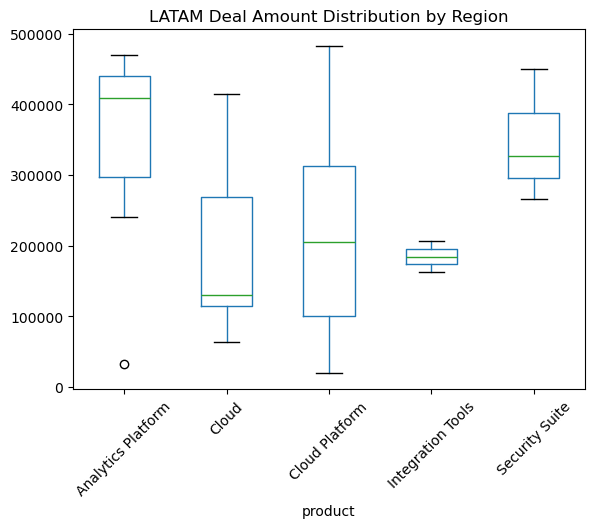

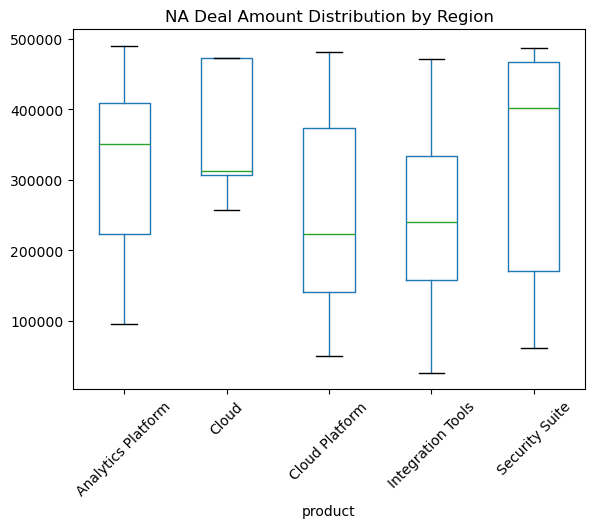

In [600]:
# Visualizations 

import matplotlib.pyplot as plt

# boxplot for the values of the different product opportunities 
closed_won = opportunity_combined[opportunity_combined["stage"] == "Closed Won"]

# filter out large outlier
filtered_won = closed_won[closed_won["amount"] <= 1e6]

latam_won = filtered_won[filtered_won["region"] == "LATAM"]
na_won = filtered_won[filtered_won["region"] == "NA"]

latam_won.boxplot(column="amount", by="product", grid=False)
plt.xticks(rotation=45)
plt.title("LATAM Deal Amount Distribution by Region")
plt.suptitle("")  # remove automatic pandas subtitle
plt.ylabel("")
plt.show()

na_won.boxplot(column="amount", by="product", grid=False)
plt.xticks(rotation=45)
plt.title("NA Deal Amount Distribution by Region")
plt.suptitle("")  # remove automatic pandas subtitle
plt.ylabel("")
plt.show()

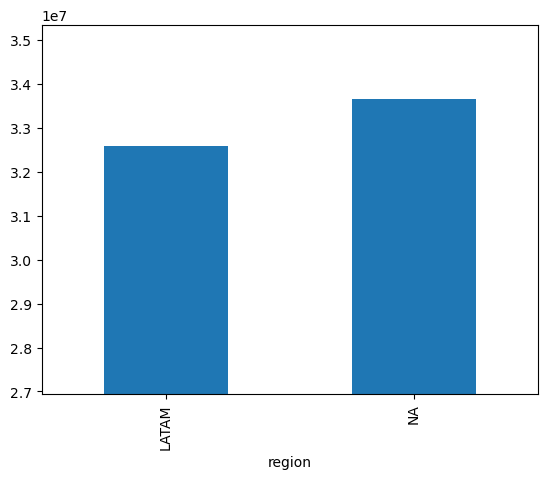

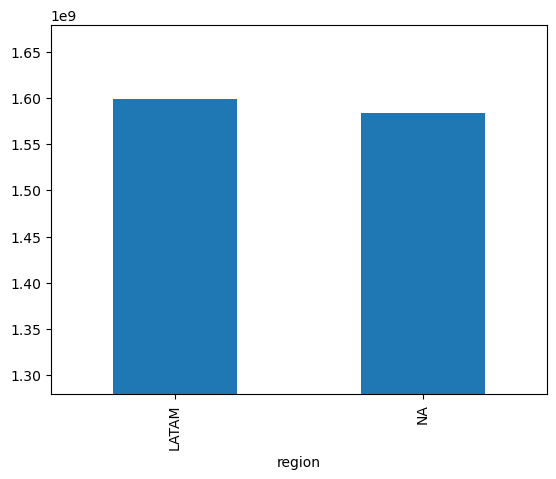

In [574]:
# Pipeline value visual
region_pipeline.plot(kind="bar")
# show the top part of the bar chart to see the differences better 
y_min = region_pipeline.max() * 0.8  
y_max = region_pipeline.max() * 1.05  
plt.ylim(y_min, y_max)
plt.show()

# with the weights
weighted_pipe = pipeline.groupby("region")["weighted_amount"].sum()
weighted_pipe.plot(kind="bar")
# show the top part of the bar chart to see the differences better 
y_min = weighted_pipe.max() * 0.8  
y_max = weighted_pipe.max() * 1.05  
plt.ylim(y_min, y_max)
plt.show()

# this shows that once we weight the pipeline, the differences are quite minimal in what is in the pipeline. 

<function matplotlib.pyplot.show(close=None, block=None)>

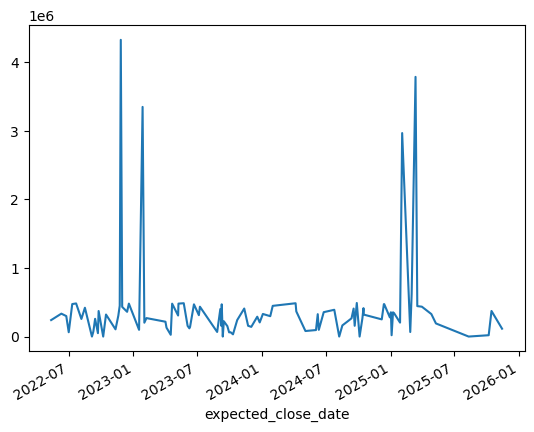

In [575]:
# we want to see if there are trends in when large deals are made

daily_values = opp_won.groupby("expected_close_date")["amount"].sum()

daily_values.plot(kind = "line")
plt.show

# no clear pattern, but we see outliers 

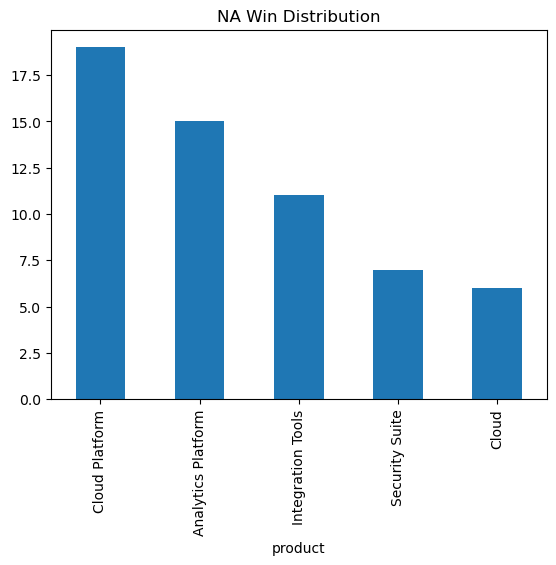

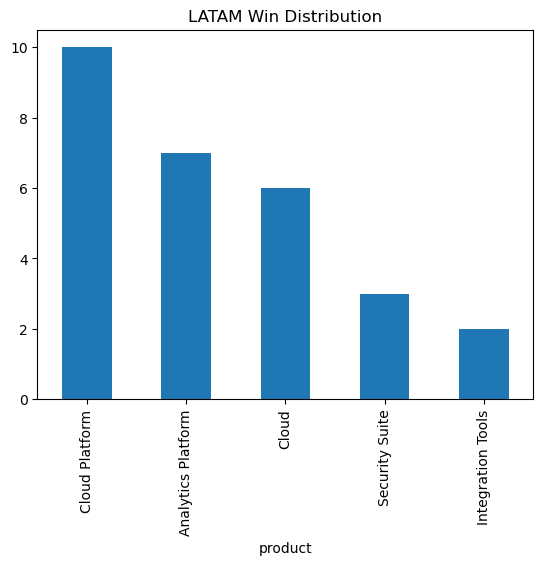

In [576]:
# which products have the most won opportunities 
group_won = opp_won.groupby("product")["stage"].count()

# group_won.plot(kind = "bar")
# plt.show()

# split by region 
na_won = opp_won[opp_won["region"] == "NA"]
na_group_won = na_won.groupby("product")["stage"].count()
sorted_na_group_won = na_group_won.sort_values(ascending=False)

sorted_na_group_won.plot(kind = "bar")
plt.title("NA Win Distribution")
plt.show()


latam_won = opp_won[opp_won["region"] == "LATAM"]
latam_group_won = latam_won.groupby("product")["stage"].count()
sorted_latam_group_won = latam_group_won.sort_values(ascending=False)

sorted_latam_group_won.plot(kind = "bar")
plt.title("LATAM Win Distribution")
plt.show()

We see that in both cases cloud platform has the highest number of wins, followed by Analytics Platform. But then it changes depending on the region. 

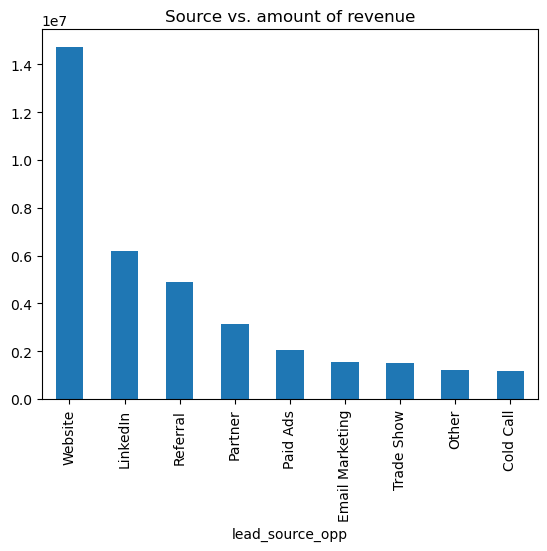

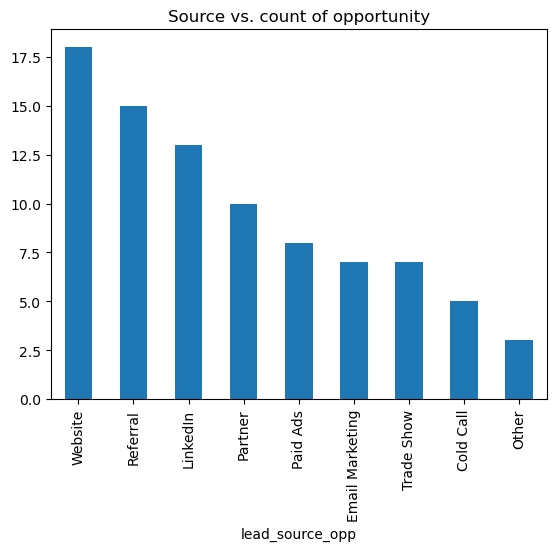

In [601]:
source_amount_sum = opp_won.groupby("lead_source_opp")["amount"].sum().sort_values(ascending = False)
source_amount_sum.plot(kind = "bar")
plt.title("Source vs. amount of revenue")
plt.show()

source_amount_count = opp_won.groupby("lead_source_opp")["amount"].count().sort_values(ascending = False)
source_amount_count.plot(kind = "bar")
plt.title("Source vs. count of opportunity")
plt.show()

This shows that linkedIn is best in both the total amount (revenue) and also the number of opportunities. Interestingly, web form garners an average amount of opportunities, but it is above average in the revenue. It is a very profitable stream. 